Challenge Set 4
Topic:        Linear Learning
Date:         07/25/2016
Name:         Matthew Mitchell
Worked with:  Seth (referred me to curve_fit)

### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set_context("talk")
sns.set_palette("muted")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from scipy.optimize import curve_fit

### <a id='1'></a>Challenge 1:
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)



In [156]:
def final_fake_prop_log(m,b,noise_amp):
    #Generate X-Values
    x_vals=np.linspace(1**-10,100,2000)
    #Compute log(x) for given X-Values
    logx=np.log(x_vals)
    #Create a linear transformation of log(x)
    lin_trans_log=m*logx+b
    #Generate Noise/Epsilon
    noise=np.random.normal(0, noise_amp, 2000)
    #Add noise to our linear transformation of log(x)
    lin_log_w_noise=lin_trans_log+noise
    #Graph log(x)
    sns.plt.scatter(x_vals,logx, c = 'darkorange')
    #Generate a quadratic regression object. 
    #X-Values later will be substituted into this object to compute y-values.
    quad_reg=np.poly1d(np.polyfit(x_vals,lin_log_w_noise, 2))
    
    #Define the type of function we want to use for regression
    def log_func(x, a, c):
        return a*(np.log(x))+c

    #Run our regression

    popt, pcov=curve_fit(log_func, x_vals,lin_log_w_noise)
    #popt returns the parameters to use for the type of function we defined.
    #We still need to therefore go generate the predicted values from our regression model.

    log_reg_y_vals=log_func(x_vals, popt[0], popt[1])
    
    sns.plt.scatter(x_vals, lin_log_w_noise)
    sns.plt.scatter(x_vals, quad_reg(x_vals), c = 'chartreuse')
    sns.plt.scatter(x_vals, log_reg_y_vals, c = 'orchid')
    sns.plt.legend(['y = log(x)','y =%slog(x)+%s'%(m,b), 'Quadratic Regression', 'Logarithmic Regression'], loc='upper left')
    sns.plt.title('Linear Transformation of Log(X) with Gaussian Noise \n m=%s b=%s noise amplitude=%s' %(m,b,noise_amp))
    sns.plt.show()

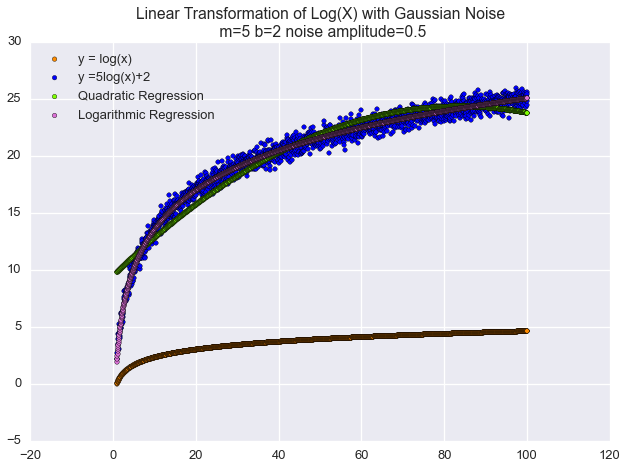

In [157]:
#Also did some interesting loops using the above function.
final_fake_prop_log(5,2,0.5)

### <a id='2'></a>Challenge 2:

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [164]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [165]:
def fake_quad(b0,b1,b2,epsilon_amp):
    #Generate some fake quadratic data with noise
    x_vals=np.linspace(-100,100,2000)
    epsilon=np.random.normal(0, epsilon_amp, 2000)
    quad_y=b0+b1*x_vals+(b2*(x_vals)**2)+epsilon
    
    
    #Split the data up!
    X_train, X_test, y_train, y_test = train_test_split(x_vals, quad_y, test_size=0.33, random_state=42)
    #Do some regression!
    quad_reg=np.poly1d(np.polyfit(X_train,y_train, 2))
    
    #Graph it!
    sns.plt.scatter(x_vals, quad_y)
    sns.plt.scatter(x_vals, quad_reg(x_vals))
    sns.plt.legend(['Quadratic with Noise','Quadratic Regression'], loc='upper left')
    sns.plt.title('Quadratic Function with Gaussian Noise \n b0=%s b1=%s b2=%s noise amplitude=%s' %(b0, b1, b2, epsilon_amp))
    sns.plt.show()
    
    #Calculate mean squared error:
    
    #For the training set
    print "Mean squared error for the training set is:", mean_squared_error(y_train, quad_reg(X_train))
    #For the test set
    print "Mean squared error for the test set is:", mean_squared_error(y_test, quad_reg(X_test))                 

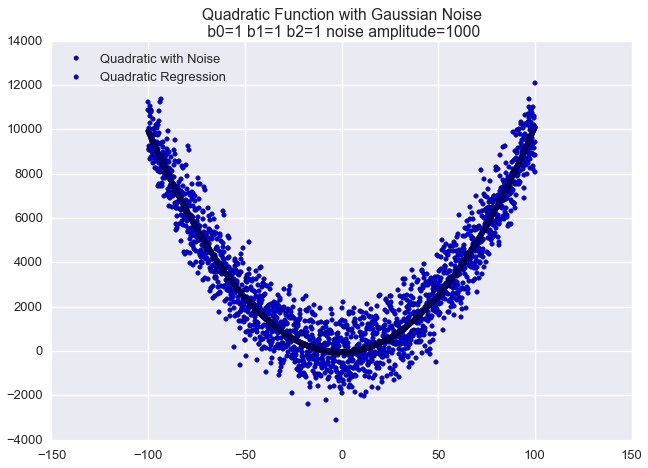

Mean squared error for the training set is: 939249.635154
Mean squared error for the test set is: 846500.405364


In [166]:
fake_quad(1,1,1,1000)

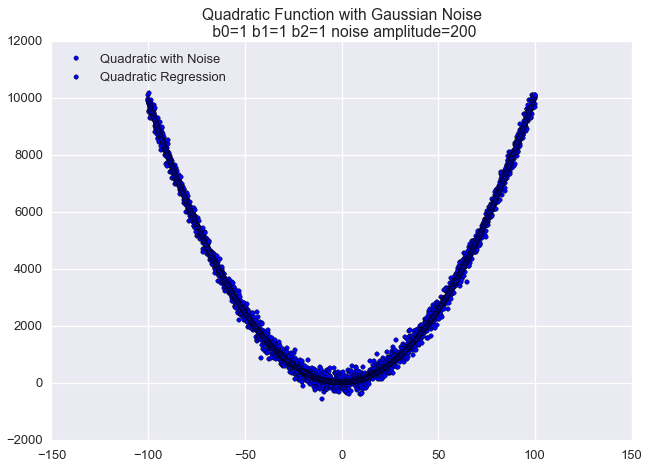

Mean squared error for the training set is: 39024.7399223
Mean squared error for the test set is: 45526.2268216


In [167]:
fake_quad(1,1,1,200)

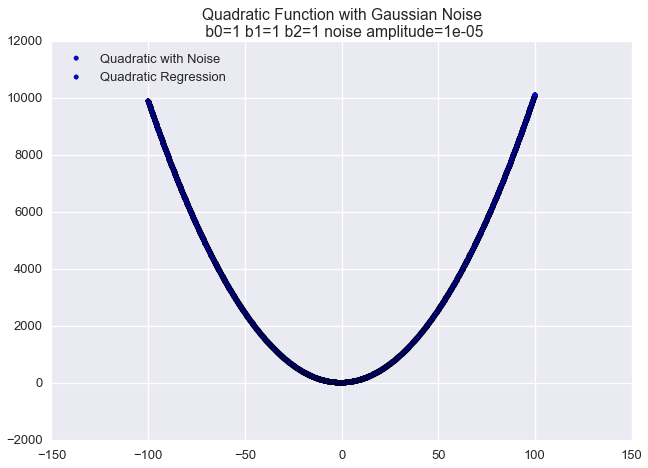

Mean squared error for the training set is: 1.02087242601e-10
Mean squared error for the test set is: 1.00765803229e-10


In [169]:
#Testing to see how mean squared error decreases as noise factor decreases.
#No noise=no error?
fake_quad(1,1,1,10**-5)

####Everything Checks out

### <a id='3'></a>Challenge 3:
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

In [184]:
from sklearn.metrics import r2_score

In [206]:
def fake_regressions(b0,b1,b2,epsilon_amp):
    #Generate some fake quadratic data with noise
    x_vals=np.linspace(-100,100,2000)
    epsilon=np.random.normal(0, epsilon_amp, 2000)
    quad_y=b0+b1*x_vals+(b2*(x_vals)**2)+epsilon
    
    
    #Split the data up!
    X_train, X_test, y_train, y_test = train_test_split(x_vals, quad_y, test_size=0.33, random_state=42)
    
    #Do lots of regression!
    regression_models = dict()
    regression_training_error=list()
    regression_testing_error=list()
    regression_r_squared=list()
    regression_AIC=list()
    for i in range(8):
        current_model=np.poly1d(np.polyfit(X_train,y_train, i))
        regression_models[i]=current_model
        #Calculate Training Error
        regression_training_error.append(mean_squared_error(y_train, current_model(X_train)))
        #Calculate Test Error
        regression_testing_error.append(mean_squared_error(y_test, current_model(X_test)))
        #Calculate R Squared
        regression_r_squared.append(r2_score(y_test, current_model(X_test)))
        #Calculate AIC
#         regression_AIC.append(mean_squared_error(y_train, current_model(X_train)))
    
    
    #Graph it!
    sns.plt.scatter(x_vals, quad_y)
    for regression in regression_models.values():
        print regression
        sns.plt.scatter(x_vals, regression(x_vals))
#     sns.plt.legend(['Quadratic with Noise','Regression'], loc='upper left')
    sns.plt.title('Quadratic Function with Gaussian Noise \n b0=%s b1=%s b2=%s noise amplitude=%s' %(b0, b1, b2, epsilon_amp))
    sns.plt.show()
    
    regression_degrees=range(8)
    sns.plt.scatter(regression_degrees, regression_training_error, c = 'r')
    sns.plt.title('Training Error as Regression Order Increases')
    sns.plt.show()
    sns.plt.scatter(regression_degrees, regression_testing_error, c = 'b')
    sns.plt.title('Testing Error as Regression Order Increases')
    sns.plt.show()
    sns.plt.scatter(regression_degrees, regression_r_squared, c = 'g')
    sns.plt.title('R squared as Regression Order Increases')
    sns.plt.show()

 
9891
 
-3.676 x + 9888
       2
2.995 x + 2.158 x - 14.18
            3         2
-0.0001076 x + 2.995 x + 2.811 x - 13.72
            4             3         2
-2.014e-06 x - 0.0001117 x + 3.012 x + 2.823 x - 30.33
            5             4             3         2
-5.963e-08 x - 2.136e-06 x + 0.0005508 x + 3.013 x + 1.408 x - 30.98
           6            5             4             3         2
1.119e-09 x - 5.74e-08 x - 1.746e-05 x + 0.0005314 x + 3.064 x + 1.437 x - 54.82
           7             6             5             4            3
3.063e-11 x + 1.198e-09 x - 5.539e-07 x - 1.839e-05 x + 0.002791 x
          2
 + 3.067 x - 1.043 x - 56.04


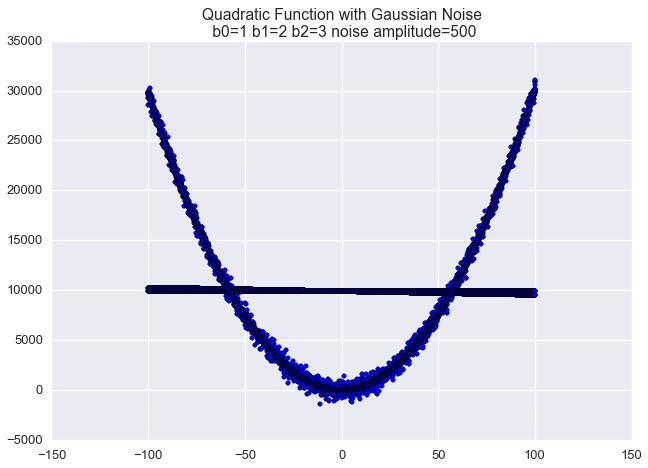

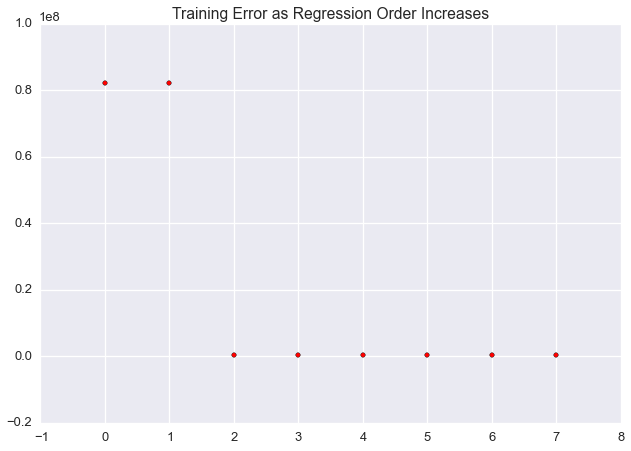

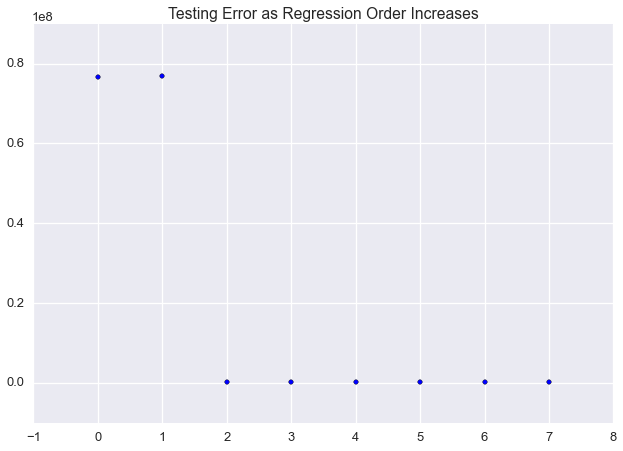

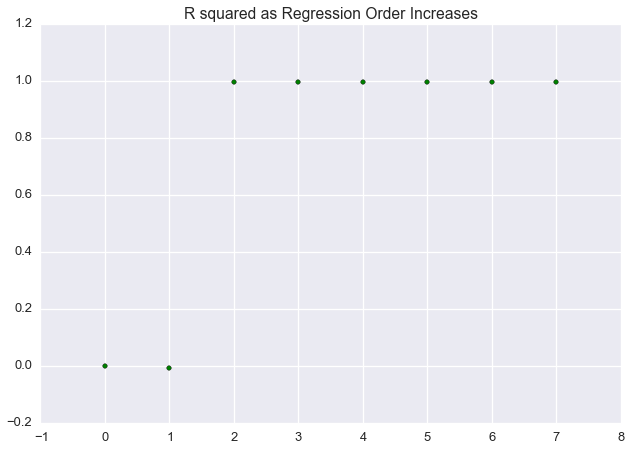

In [207]:
fake_regressions(1,2,3,500)

### <a id='4'></a>Challenge 4:
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [238]:
def learning_curve(b0,b1,b2,epsilon_amp):
    #Generate some fake quadratic data with noise
    x_vals=np.linspace(-100,100,2000)
    epsilon=np.random.normal(0, epsilon_amp, 2000)
    quad_y=b0+b1*x_vals+(b2*(x_vals)**2)+epsilon
    
    
    #Split the data up!
    X_train, X_test, y_train, y_test = train_test_split(x_vals, quad_y, test_size=0.33, random_state=42)
    
    #Do lots of regression!
    length=len(X_train)
    number_of_sections=(length//5)+2
    training_size=list()
    training_error=list()
    testing_error=list()
    for section in range(1, number_of_sections):
        current_train_x=X_train[:section*5]
        current_train_y=y_train[:section*5]
        training_size.append(section)
        current_model=np.poly1d(np.polyfit(current_train_x,current_train_y, 2))
        #Calculate Training Error
        training_error.append(mean_squared_error(current_train_y, current_model(current_train_x)))
        #Calculate Test Error
        testing_error.append(mean_squared_error(y_test, current_model(X_test)))
    
    
    #Graph it!
    sns.plt.scatter(training_size, training_error, c = 'r')
    sns.plt.scatter(training_size, testing_error, c = 'b')
    sns.plt.legend(['Training Error','Testing Error'], loc='upper left')
    sns.plt.show()

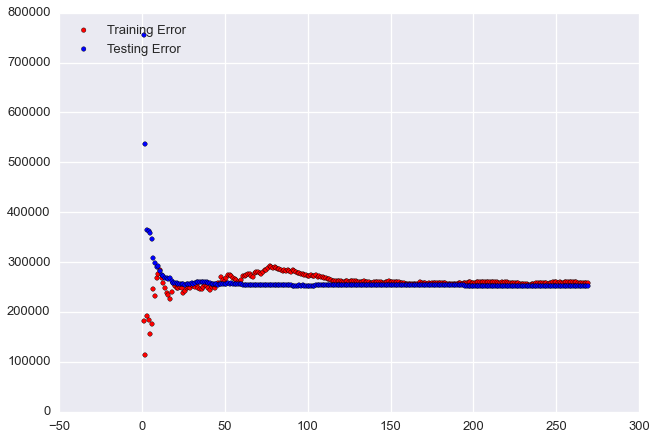

In [239]:
learning_curve(1,2,3,500)